#  INF131: The case of flight passengers prediction

### Build a classifier to predict number of passengers in flights

# Ομάδα Νο 44
## Μέλη: 
### Ξενουλέας Ευστράτιος (p3150130)
### Σταρατζής Δημήτριος (p3150166)
### Νάμπουρη Χρυσούλα Μαρία (t8150096)

## Περιγραφή Project
---

Στα πλαίσια της εργασίας του μαθήματος "Εξόρυξη Γνώσης από Βάσεις Δεδομένων και τον Παγκόσμιο Ιστό" ασχοληθήκαμε με ένα <u>supervised learning πρόβλημα</u> και συγκεκριμένα με ένα <u>πρόβλημα κατηγοριοποίησης</u>. 
<P> Πιο συγκεκριμένα, δίνεται ένα σύνολο δεδομένων το οποίο αποτελείται από μερικές χιλιάδες πτήσεις στην Αμερική, όπου κάθε πτήση περιγράφεται απο ένα σύνολο μεταβλητών (αεροδρόμιο αναχώρησης, αεροδρόμιο άφιξης, κτλ). Κάθε πτήση χαρακτηρίζεται επίσης από μια μεταβλητή που σχετίζεται με τον αριθμό των επιβατών της πτήσης (π.χ. κάθε τιμή της μεταβλητής σχετίζεται με ενα εύρος πλήθους επιβατών). Για κάποιες πτήσεις, η τιμή της μεταβλητής  είναι γνωστή, ενώ για άλλες όχι. Στόχος είναι να προβλέψουμε την τιμή της μεταβλητής για τις πτήσεις για τις οποίες δεν είναι διαθέσιμη.


## Dataset
---
Το αρχείο με όνομα `train.csv` περιέχει τα δεδομένα εκπαίδευσης (training set) του προβλήματος, ενώ το αρχείο `test.csv` περιέχει τα δεδομένα ελέγχου (test set) του προβλήματος. Κάθε γραμμή των δυο αυτών αρχείων αντιστοιχεί σε μια πτήση, η οποία χαρακτηρίζεται από τις εξής μεταβλητές:

*   __DateOfDeparture:__ Ημερομηνία Αναχώρησης
*   __Departure:__ Κωδικός Αεροδρομίου Αναχώρησης
*   __CityDeparture:__ Όνομα Αεροδρομίου Αναχώρησης
*   __LongitudeDeparture:__ Γεωγραφικό Μήκος Αεροδρομίου Αναχώρησης
*   __LatitudeDeparture:__ Γεωγραφικό Πλάτος Αεροδρομίου Αναχώρησης
*   __Arrival:__ Κωδικός Αεροδρομίου Άφιξης
*   __CityArrival:__ Κωδικός Αεροδρομίου Άφιξης
*   __LongitudeArrival:__ Γεωγραφικό Μήκος Αεροδρομίου Άφιξης
*   __LatitudeArrival:__ Γεωγραφικό Πλάτος Αεροδρομίου Άφιξης
*   __WeeksToDeparture:__ Πόσες εβδομάδες πριν την αναχώρηση της πτήσης κατά μέσο όρο έκλεισαν οι επιβάτες τα εισιτήριά τους
*   __std_wtd:__ Τυπική απόκλιση για το WeeksToDeparture.


Το training set περιέχει μια επιπλέον μεταβλητή (PAX), η οποία έχει σχέση με τον αριθμό των επιβατών της πτήσης. Η μεταβλητή αυτή παίρνει 8 διαφορετικές τιμές (τιμές από 0 έως 7 οπότε 8 κατηγορίες συνολικά). Κάθε κατηγορία υποδηλώνει πόσοι περίπου επιβάτες χρησιμοποίησαν την πτήση. Οι αριθμοί στις κατηγορίες έχουν ανατεθεί με τυχαίο τρόπο.

<p> Η μεταβλητή `PAX` λείπει από το test set, καθώς πρόκειται για την μεταβλητή που πρέπει να προβλέψουμε στα πλαίσια της παρούσας εργασίας.</p>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pprint
import codecs
import csv
import time
import math
import datetime
import calendar
import keras.utils
import geopy.distance
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from imblearn.over_sampling import RandomOverSampler 
from ggplot import *
from datetime import date
from matplotlib.pyplot import hist
from sklearn.manifold import TSNE
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from keras import backend as K
from keras import metrics, callbacks, models
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Input
from keras.optimizers import Adam, Adadelta

/home/stratos/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/stratos/anaconda3/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


# Specify Develop or Test

In [2]:
DEVELOP = True
TEST = False

## Write Function
Η παρακάτω συνάρτηση είναι υπεύθυνη για τη δημιουργία του τελικού αρχείου, μορφής .csv, το οποίο είναι και το αποτέλεσμα του μοντέλου μας. Ως αποτέλεσμα θα επιστρέφεται ο αριθμός της πτήσης και η πρόβλεψη για την κατηγορία αριθμού επιβατών της (αριθμοί 0-7).

In [3]:
def write_csv(y_pred, name):
    with open(name, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile, delimiter=',')
        writer.writerow(['Id', 'Label'])
        for i in range(y_pred.shape[0]):
            writer.writerow([i, y_pred[i]])
        

## Load Data
---
Η παρακάτω συνάρτηση φορτώνει τα δεδομένα training και test από τα αντίστοιχα αρχεία μορφής .csv. Το training set περιλαμβάνει 8899 γραμμές και 12 στήλες, ενώ το test set περιλαμβάνει 2229 γραμμές και 11 στήλες . Η στήλη που λείπει στο test είναι η PAX (label).

In [4]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

## Analyze Data
---
### Αρχικά, γίνεται μία πρώτη ανάλυση των δεδομένων για την καλύτερη κατανόησή τους. <br>
Βρίσκουμε min, max των ποσοτικών μεταβλητών το οποίο όπως θα δούμε στην πορεία θα μας βοηθήσει στην κανονικοποίηση των δεδομένων μας.<br>


In [5]:
frame = pd.DataFrame(columns=['Feature','MinValue','MaxValue'])

for column in df_train:
  if(df_train[column].dtypes=='float') or (df_train[column].dtypes=='int') or (column=='DateOfDeparture'):
    
    frame = frame.append({
      'Feature': column,
      'MinValue' : min(df_train[column]),
      'MaxValue' : max(df_train[column])    
    }, ignore_index=True)
    
frame

,Feature,MinValue,MaxValue
0,DateOfDeparture,2011-09-01,2013-03-05
1,LongitudeDeparture,25.7933,47.449
2,LatitudeDeparture,-122.375,-71.0052
3,LongitudeArrival,25.7933,47.449
4,LatitudeArrival,-122.375,-71.0052
5,WeeksToDeparture,2.625,21.9333
6,std_wtd,2.16025,15.8622
7,PAX,0,7


## Create New Feautures

---


Έχοντας κάνει μία πρώτη ανάλυση των χαρακτηριστικών και γνωρίζοντας, πλέον, τη μορφή τους, τον τύπο τους, το εύρος τιμών τους, συνεχίζουμε με την επεξεργασία τους. <br>
Πιο συγκεκριμένα, προσπαθούμε να δημιουργήσουμε από αυτά τα "απλά" χαρακτηριστικά, πιο "σύνθετα" (ranges), προκειμένου να παράξουμε γνώση και να δώσουμε αξία στο μοντέλο μας.

### Form Date Of Departure
---
__Η παρακάτω διαδικασία είναι υπεύθυνη για την επεξεργασία της ημερομηνίας.__ <br>

Είναι σκόπιμο, αρχικά, να διαχωρίσουμε το έτος ['Year'], τον μήνα ['Month'] και την μέρα ['Day'], καθώς μπορούμε να συλλέξουμε πολλές πληροφορίες από το καθένα χωριστά. 
Αφού, διασπάσαμε αυτή τη μία μεταβλητή σε τρεις, το επόμενο βήμα είναι να βρούμε <u> σε ποιά μέρα της εβδομάδας </u> αντιστοιχεί αυτή η ημερομηνία ['WeekDay']. 
Το κέρδος από αυτήν τη νέα μεταβλητή φαίνεται συγκρίνοντάς την με την υπάρχουσα μεταβλητή 'Day'. <u>Από εκεί που είχαμε ένα εύρος τιμών 1-31</u>, τώρα έχουμε καταφέρει <u>να το περιορίσουμε σε 1-7 (ημέρες εβδομάδας)</u>. Αυτό μας βοηθάει στο ότι πλέον ομαδοποιούμε τις πτήσεις με κοινό χαρακτηριστικό την ημέρα της εβδομάδας κάτι το οποίο μπορεί να μας επιφέρει επιπλέον συσχέτιση μεταξύ αυτών. 



In [6]:
def split_date(date_time):
  components = date_time.split('-')
  return int(components[0]), int(components[1]), int(components[2])


for dataset in [df_train, df_test]:
   
  years = []
  months = []
  days = []
  weekDays = []

  for date in dataset['DateOfDeparture']:
      year, month, day = split_date(date)
      years.append(year)
      months.append(month)
      days.append(day)
      date_time = datetime.datetime(year, month, day)
      week_day = calendar.day_name[date_time.weekday()]
      weekDays.append(week_day)
    
  dataset['Year'], dataset['Month'],dataset['Day'], dataset['WeekDay'] = years, months, days, weekDays

df_train.head()

,DateOfDeparture,Departure,CityDeparture,LongitudeDeparture,LatitudeDeparture,Arrival,CityArrival,LongitudeArrival,LatitudeArrival,WeeksToDeparture,std_wtd,PAX,Year,Month,Day,WeekDay
0,2011-12-05,ORD,Chicago,41.978603,-87.904842,EWR,Newark,40.692500,-74.168667,8.352941,5.667243,7,2011,12,5,Monday
1,2013-03-01,ATL,Atlanta,33.636719,-84.428067,LGA,New York,40.777245,-73.872608,10.421053,10.001754,7,2013,3,1,Friday
2,2012-02-06,ORD,Chicago,41.978603,-87.904842,BOS,Boston,42.364347,-71.005181,9.250000,7.136821,7,2012,2,6,Monday
3,2012-12-10,ORD,Chicago,41.978603,-87.904842,SFO,San Francisco,37.618972,-122.374889,8.666667,7.404291,7,2012,12,10,Monday
4,2012-04-13,SFO,San Francisco,37.618972,-122.374889,JFK,New York,40.639751,-73.778925,14.037037,9.858544,7,2012,4,13,Friday


### Season Extraction
Στη συνέχεια με βάση το μήνα  <u> βρίσκουμε τις εποχές</u> (Χειμώνας, Άνοιξη, Καλοκαίρι, Φθινόπωρο) ['Season']. Αυτό είναι ιδιαίτερα σημαντικό, καθώς πάλι καταφέρνεις να κατηγοριοποιήσεις <u>12 τιμές σε 4</u>. Άλλωστε, είναι λογικό πως η ζήτηση για κάθε πτήση είναι διαφορετική ανά εποχή (πχ διαφορετικοί προορισμοί κυριαρχούν το χειμώνα και διαφορετικοί το καλοκαίρι).

In [7]:
for dataset in [df_train, df_test]:
  
  season = []

  for month in dataset['Month']:
    if month in [12, 1, 2] : season.append('WINTER')
    if month in [3, 4, 5] : season.append('SPRING')
    if month in [6, 7, 8] : season.append('SUMMER')
    if month in [9, 10, 11] : season.append('FALL')
    
  dataset['Season'] = season

  
df_train.head()

,DateOfDeparture,Departure,CityDeparture,LongitudeDeparture,LatitudeDeparture,Arrival,CityArrival,LongitudeArrival,LatitudeArrival,WeeksToDeparture,std_wtd,PAX,Year,Month,Day,WeekDay,Season
0,2011-12-05,ORD,Chicago,41.978603,-87.904842,EWR,Newark,40.692500,-74.168667,8.352941,5.667243,7,2011,12,5,Monday,WINTER
1,2013-03-01,ATL,Atlanta,33.636719,-84.428067,LGA,New York,40.777245,-73.872608,10.421053,10.001754,7,2013,3,1,Friday,SPRING
2,2012-02-06,ORD,Chicago,41.978603,-87.904842,BOS,Boston,42.364347,-71.005181,9.250000,7.136821,7,2012,2,6,Monday,WINTER
3,2012-12-10,ORD,Chicago,41.978603,-87.904842,SFO,San Francisco,37.618972,-122.374889,8.666667,7.404291,7,2012,12,10,Monday,WINTER
4,2012-04-13,SFO,San Francisco,37.618972,-122.374889,JFK,New York,40.639751,-73.778925,14.037037,9.858544,7,2012,4,13,Friday,SPRING


### Vacations Extraction
---
Χρησιμοποιώντας πάλι την ημερομηνία, κρίναμε ότι πρέπει να δοθεί έμφαση και στις <u>σημαντικές περιόδους - εορτές</u>, καθώς η συμπεριφορά των επιβατών τότε τείνει να είναι διαφορετική σε σχέση με τον υπόλοιπο χρόνο. Για το λόγο αυτό δημιουργήσαμε ένα νέο χαρακτηριστικό ['Vacations'], το οποίο εντάσσει κάθε πτήση σε μια από τις παρακάτω κατηγορίες:

*   Xmas
*   New Year
*   Spring Break
*   Memorial Day
*   Summer Vacations
*   Labor Day
*   Thanksgiving
*   None





In [8]:
for dataset in [df_train, df_test]:
  
  vacations = []

  for index, row in dataset.iterrows():
    month, day = row['Month'], row['Day']
    if month == 12 and day in range(10, 31): 
        vacations.append('XMAS')
    elif month == 1 and day in range(1, 20): 
        vacations.append('NEW_YEAR')
    elif month in [3, 4]:
        vacations.append('SPRING_BREAK')
    elif month == 5 and day in range(25, 31): 
        vacations.append('MEMORIAL_DAY')
    elif month == 7 or month == 8:
        vacations.append('SUMMER_VACATIONS')
    elif month == 9 and day in range(1, 7):
        vacations.append('LABOR_DAY')
    elif month == 11 and day in range(22, 28):
        vacations.append('THANKSGIVING')
    else:
        vacations.append('NONE')
        
  dataset['Vacations'] = vacations

### Distance Extraction
---
__Οι επόμενες μεταβλητές με τις οποίες ασχοληθήκαμε είναι το longitude και το latitude.__<br>
Μέσα από αυτές τις μεταβλητές, κρίναμε ότι χρειάζεται να δημιουργήσουμε μία πιο σχετική μετρική, μέσα από την οποία θα μπορεί να γίνει κάποια συσχέτιση των πτήσεων. Έτσι, δημιουργήσαμε ένα χαρακτηριστικό ['Distance'], το οποίο θα περιέχει την απόσταση που πρέπει να διανυθεί σε κάθε πτήση (από την πόλη αναχώρησης στην πόλη άφιξης) καθώς πτήσεις με μικρή απόσταση πιθανών να έχουν περισσότερους επιβάτες ή το αντίστροφο. Για τη δημιουργία αυτής της μεταβλητής χρησιμοποιήθηκε η βιβλιοθήκη GeoPy.

*Τα ζευγάρια (Latitude, Longitude) είναι ανεστραμμένα στο dataset γι'αυτό και καλούμε τη συνάρτηση με ανεστραμένα ορίσματα.

In [9]:
def calculate_distance(LatitudeDeparture, LongitudeDeparture, LatitudeArrival, LongitudeArrival):
    return geopy.distance.distance((LatitudeDeparture, LongitudeDeparture), (LatitudeArrival, LongitudeArrival)).km


for dataset in [df_train, df_test]:
  
  distances = []

  for index, row in dataset.iterrows():
    distance = calculate_distance(row['LongitudeDeparture'], row['LatitudeDeparture'], row['LongitudeArrival'], row['LatitudeArrival'])
    distances.append(int(round(distance, 0)))
    
  dataset['Distance'] = distances  

### Mean +- std Extraction

---

Στη συνέχεια ασχολούμαστε με τις μεταβλητές ['WeeksToDeparture'] και ['std_wtd']. Δημιουργήσαμε δύο επιπλέον χαρακτηριστικά ['mean_minus_std'] και ["mean_plus_std"] προκειμένου να συνδυάσουμε τις 2 μεταβλητές. Υποθέτοντας πως κάθε πτήση, η διαδικασία των κρατήσεων εισιτηρίων ακολουθεί κανονική κατανομή, τότε ο ΜΟ των εβδομάδων (WeeeksToDeparture) +- την τυπική απόκληση (std_wtd), μας οδηγεί σε δύο νέες τιμές οι οποίες φαίνονται στο σχήμα και μας προσφέρουν μια νέα πληροφορία για κάθε πτήση. Το απεικονιζόμενο διάστημα αποτελεί το 68% των παρατηρήσεων, όπου στη συγκεκριμένη περίπτωση είναι το διάστημα κρατήσεων για κάθε πτήση.


/home/stratos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  """


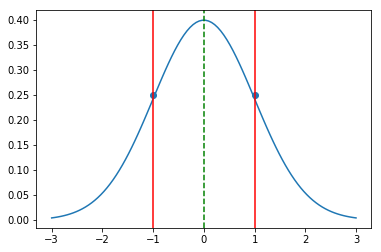

In [10]:
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.axvline(-1, color='r')
plt.axvline(1, color='r')
plt.axvline(0, color='g', linestyle='--')
plt.scatter([-1, 1], [0.25, 0.25])
plt.show()

In [11]:
for dataset in [df_train, df_test]:
  mean_minus_std = []
  mean_plus_std = []

  for index, row in dataset.iterrows():
      mean_minus_std.append(row['WeeksToDeparture']-row['std_wtd'])
      mean_plus_std.append(row['WeeksToDeparture'] + row['std_wtd'])
    
  dataset['mean_minus_std'] = mean_minus_std
  dataset['mean_plus_std'] = mean_plus_std

## Configure Test

---


<p>Μέσα από την παρακάτω διαδικασία επιλέγουμε ποιες μεταβλητές από το dataset θέλουμε να κρατήσουμε, προκειμένου να εκπαιδεύσουμε το μοντέλο μας. </p>
Για να μπορεί να δουλέψει ένα αλγόριθμος ταξινόμησης είναι απαραίτητο το training και το test set να έχουν ακριβώς τον ίδιο αριθμό στηλών (ίδιες μεταβλητές).

In [12]:
if TEST:
    y_train = df_train[['PAX']]

    df_train.drop(df_train.columns[[0,2,6,9,10,11]], axis=1, inplace=True)

    df_test.drop(df_test.columns[[0,2,6,9,10]], axis=1, inplace=True)

## Configure Development
---
Αντίστοιχα, όπως και στη διαδικασία του testing, έτσι και εδώ, επιλέγουμε τα features που θέλουμε να κρατήσουμε κατά την διαδικασία του training. Αυτή τη φορά διαχωρίζουμε όμως το training set ώστε στα δεδομένα ελέγχου να έχουμε και τις αντίστοιχες κατηγορίες με στόχο να παρατηρούμε τη πορεία του μοντέλου. 

In [13]:
if DEVELOP:
    y_train = df_train[['PAX']]

    df_train, df_test, y_train, y_test = train_test_split(df_train, y_train, test_size=0.2, random_state=42)

    y_test = df_test[['PAX']]

    df_train.drop(df_train.columns[[0,2,6,9,10,11]], axis=1, inplace=True)

    df_test.drop(df_test.columns[[0,2,6,9,10,11]], axis=1, inplace=True)

## Form Data Types

---

Τελειώνοντας με τη δημιουργία σύνθετων χαρακτηριστικών, είναι απαραίτητο να επεξεργαστούμε τη μορφή τους, ούτως ώστε να εναρμονίζονται μεταξύ τους και να ταιριάζουν στο μοντέλο πρόβλεψης.

#### Normalization Function
<p>Ξεκινώντας με τα <b>ποσοτικά χαρακτηριστικά</b> δημιουργούμαι συνάρτηση η οποία υλοποιεί την <u>κανονικοποίησή</u> τους.
</p >

Σε αυτό το σημείο κάνουμε μια κανονικοποίηση των τιμών σε συγκεκριμένα features με σκοπό οι τιμές αυτών να βρίσκονται στο ίδιο εύρος.
Εκτελούμε αυτή τη διαδικασία καθώς γνωρίζουμε ότι είναι πολύ σημαντικό για τους classifiers κατά τη διαδικασία του trainning να διαχειρίζονται τιμές οι οποίες έχουν το ίδιο εύρος. Χρησιμοποιήσαμε των παρακάτω τύπο για την κανονικοποίησης για να 'φέρουμε' τις τιμές στο 0-1:

\begin{equation*}
z_i = \frac{x_i + min(x)}{max(x) - min(x)}
\end{equation*}

όπου χ είναι το μη-κονονικοποιημένο feature, $x_i$ οι μη κανονικοποιημένες τιμές το feature x και $z_i$ οι αντίστοιχες κανονικοποιημένες τιμές για το feature x που επεξεργαζόμαστε.

In [14]:
def normalize_feature(feature_name, dataset):
    min_dataset = dataset[feature_name].min()
    max_dataset = dataset[feature_name].max()
    new_dataset = []

    for index, row in dataset.iterrows():
        new_dataset.append((row[feature_name] - min_dataset)/(max_dataset - min_dataset))
        
    dataset[feature_name] = new_dataset

### Call Normalization Function 

---

Σε αυτό το σημείο επιλέγουμε τα ποσοτικά χαρακτηριστικά που θέλουμε να κανονικοποιήσουμε και καλούμε την παραπάνω συνάρτηση.
<p> Τα χαρακτηριστικά αυτά είναι οι μεταβλητές 'Distance', 'LongitudeDeparture', 'LatitudeDeparture', 'LongitudeArrival', 'LatitudeArrival', 'Day', 'mean_minus_std' και 'mean_plus_std'.

In [15]:
features_to_use = ['Distance', 'LongitudeDeparture', 'LatitudeDeparture', 'LongitudeArrival', 'LatitudeArrival', 'Day', 'mean_minus_std', 'mean_plus_std']

for dataset in [df_train, df_test]:
  for feature in features_to_use:
    normalize_feature(feature, dataset)

df_train.head()

,Departure,LongitudeDeparture,LatitudeDeparture,Arrival,LongitudeArrival,LatitudeArrival,Year,Month,Day,WeekDay,Season,Vacations,Distance,mean_minus_std,mean_plus_std
2755,IAH,0.193537,0.526253,ORD,0.747393,0.671019,2011,11,0.266667,Wednesday,FALL,NONE,0.293958,0.375088,0.342760
1941,DFW,0.328023,0.493226,LAS,0.475015,0.140601,2012,11,0.033333,Friday,FALL,NONE,0.345499,0.537907,0.265810
3424,LAX,0.376310,0.077221,JFK,0.685569,0.946004,2012,8,0.066667,Friday,SUMMER,SUMMER_VACATIONS,0.909001,0.878578,0.846036
4081,LAX,0.376310,0.077221,SEA,1.000000,0.001277,2012,9,0.666667,Friday,FALL,NONE,0.305302,0.568213,0.515269
5505,DFW,0.328023,0.493226,DEN,0.649638,0.344594,2011,9,0.366667,Monday,FALL,NONE,0.181258,0.571421,0.334462


### Transform String Features to Values

---

Στη συνέχεια μετασχηματίζουμε τα __ποιοτικά χαρακτηριστικά__. 
<p> Οι στήλες των training και test set περιέχουν κατηγορικές μεταβλητές των οποίων οι τιμές είναι αλφαριθμητικά. Οι αλγόριθμοι ταξινόμησης ωστόσο δουλεύουν μόνο με αριθμητικές τιμές, οπότε χρειάστηκε να γίνει κάποιος μετασχηματισμός.</p>
<p><u> 

#### 1) Transofrm strings to values with LabelEncoder

---

Η πρώτη προσέγγιση για την αριθμητική αναπαράσταση των κατηγορικών μεταβλητών ήταν με την τεχνική __LabelEncoder__. </u>
<p>Ουσιαστικά, η συνάρτηση αυτή βάζει αριθμητικές ετικέτες σε όλες τις πιθανές τιμές ενός χαρακτηριστικού. Για παράδειγμα, στη μεταβλητή ['Departure'] θα μπορούσε να αναπαραστήσει τη τιμή 'ORD' με 1, την τιμή 'ATL' με 2 και ούτω καθεξής. Επειδή και η μεταβλητή ['Arrival'] περιέχει τις ίδιες τιμές, τότε η κωδικοποίηση των τιμών των δύο μεταβλητών θα είναι η ίδια. <p>
  <p> Το πρόβλημα με τη συγκεκριμένη κωδικοποίηση-αναπαράσταση των κατηγορικών μεταβλητών, έγκειται στο γεγονός ότι ο ταξινομητής μας μπορεί να θεωρήσει μια ιεραρχία στα δεδομένα μας. Σύμφωνα και με το παραπάνω παράδειγμα, αν 1='ORD' και 2='ATL', ο ταξινομητής μας μπορεί 'μπερδευτεί' συγκρίνοντας αυτό το feature αλγεβρικά, δηλαδή 1< 2< 3 κλπ. </p>
  <p>Στη πραγματικότητα όμως δεν υπάρχει τέτοια συσχέτιση καθώς η κάθε τιμή είναι ανεξάρτητη από τις υπόλοιπες και υποδηλώνει κάτι ξεχωριστό. Παρ' όλα αυτά κρατάμε την συγκεκριμένη πληρoφορία αλλά στη πορεία την 'εμπλουτίζουμε' με τη διαδικασία του one-hot encoding ώστε να λύσουμε το προαναφερθέν πρόβλημα.
   

In [16]:
def encode_feature(feature_name):
    encoder = LabelEncoder()
    encoder.fit(df_train[feature_name])
   
    df_train[feature_name] = encoder.transform(df_train[feature_name])
    df_test[feature_name] = encoder.transform(df_test[feature_name])

Παράλληλα, η παραπάνω μέθοδος του LabelEncoder, αξιοποιείται τελικά με βάση μία διαφορετική προσέγγιση. Χρησιμοποιείται <u>βοηθητικά</u>, προκειμένου να υλοποιήσουμε μία <u>τεχνική μείωσης διάστασης</u> και συγκεκριμένα την <u> PCA</u>. Οι μεταβλητές που θέλουμε να συνδυάσουμε είναι οι 'Departure', 'Arrival', 'Year', 'Month', 'WeekDay', 'Day', 'Season' και 'Vacations'. Σκοπός είναι να δημιουργήσουμε ένα επιπλέον χαρακτηριστικό, το οποίο θα περιέχει την συμπιεσμένη πληροφορία των προηγούμενων. Τέλος, το κανονικοποιούμε, ώστε να είναι στο ίδιο εύρος τιμών με τα υπόλοιπα.

In [17]:
columns_to_feature = ['Departure', 'Arrival', 'Year', 'Month', 'WeekDay', 'Season', 'Vacations']

for feature_name in columns_to_feature:
    encode_feature(feature_name)
    
extra_train_df = pd.concat([df_train['Departure'], df_train['Arrival'], df_train['Year'], df_train['Month'], df_train['WeekDay'], df_train['Day'], df_train['Season'], df_train['Vacations']], axis=1)
extra_test_df = pd.concat([df_test['Departure'], df_test['Arrival'], df_test['Year'], df_test['Month'], df_test['WeekDay'], df_test['Day'], df_test['Season'], df_test['Vacations']], axis=1)

pca = PCA(n_components=1)
pca.fit(extra_train_df)

X_train_extra = pca.transform(extra_train_df)
df_train['embending'] = X_train_extra
normalize_feature('embending', df_train)

X_test_extra = pca.transform(extra_test_df)
df_test['embending'] = X_test_extra
normalize_feature('embending', df_test)

df_train.head()

,Departure,LongitudeDeparture,LatitudeDeparture,Arrival,LongitudeArrival,LatitudeArrival,Year,Month,Day,WeekDay,Season,Vacations,Distance,mean_minus_std,mean_plus_std,embending
2755,7,0.193537,0.526253,15,0.747393,0.671019,0,10,0.266667,6,0,3,0.293958,0.375088,0.342760,0.289542
1941,4,0.328023,0.493226,9,0.475015,0.140601,1,10,0.033333,0,0,3,0.345499,0.537907,0.265810,0.370916
3424,10,0.376310,0.077221,8,0.685569,0.946004,1,7,0.066667,0,2,5,0.909001,0.878578,0.846036,0.552714
4081,10,0.376310,0.077221,18,1.000000,0.001277,1,8,0.666667,0,0,3,0.305302,0.568213,0.515269,0.286350
5505,4,0.328023,0.493226,3,0.649638,0.344594,0,8,0.366667,1,0,3,0.181258,0.571421,0.334462,0.530541


Παρακάτω, με την ίδια λογική, υλοποιούμε διάφορα νέα χαρακτηριστικά με τη μέθοδο PCA, συνδυάζοντας διάφορες μεταβλητές, προκειμένου να δούμε κατά πόσο μπορούμε να μειώσουμε τις διαστάσεις χωρίς, όμως, να χάσουμε πληροφορία από τα δεδομένα.
<p> Τα επικρατέστερα ήταν αυτά που συνδύασαν τις μεταβλητές 'LongitudeDeparture', 'LatitudeDeparture' και 'Distance' σε ένα χαρακτηριστικό ['ldd'], και παρόμοια για τα χαρακτηριστικά 'LongitudeDeparture', 'LatitudeDeparture' και 'Distance' σε ένα άλλο χαρακτηριστικό ['lad'].

In [18]:
pca = PCA(n_components=1)
pca.fit(pd.concat([df_train['LongitudeDeparture'], df_train['LatitudeDeparture'], df_train['Distance']], axis=1))
ldd_train = pca.transform(pd.concat([df_train['LongitudeDeparture'], df_train['LatitudeDeparture'], df_train['Distance']], axis=1))
ldd_test = pca.transform(pd.concat([df_test['LongitudeDeparture'], df_test['LatitudeDeparture'], df_test['Distance']], axis=1))
    
df_train['ldd'] = ldd_train
normalize_feature('ldd', df_train)

df_test['ldd'] = ldd_test
normalize_feature('ldd', df_test)


pca = PCA(n_components=1)
pca.fit(pd.concat([df_train['LongitudeArrival'], df_train['LatitudeArrival'], df_train['Distance']], axis=1))
lad_train = pca.transform(pd.concat([df_train['LongitudeArrival'], df_train['LatitudeArrival'], df_train['Distance']], axis=1))
lad_test = pca.transform(pd.concat([df_test['LongitudeArrival'], df_test['LatitudeArrival'], df_test['Distance']], axis=1))

df_train['lad'] = lad_train
normalize_feature('lad', df_train)

df_test['lad'] = lad_test
normalize_feature('lad', df_test)

corr = df_train.corr()

#### 2) Transform strings features to 1 hot Vectors

---
Εν τέλει, έχοντας καταλήξει στα τελικά features, για να λυθεί το πρόβλημα των ποιοτικών μεταβλητών, χρησιμοποιήσαμε την τεχνική κωδικοποίησης <b>1-hot-Vectors</b>, την οποία υλοποιούμαι στη συνέχεια. <u>Όμως παράλληλα κρατάμε την πληροφορία του label encoded feature και την κανονικοποιούμε.</u>
Ουσιαστικά, με την τεχνική __1-hot-Vectors__ δημιουργείται μια ξεχωριστή μεταβλητή για κάθε πιθανή τιμή ενός χαρακτηριστικού. Ανάλογα με την τρέχουσα τιμή του, μια από αυτές τις μεταβλητές είναι 1, ενώ όλες οι υπόλοιπες παραμένουν 0.</p>
  <p> Παραδείγματος χάρη, η μεταβλητή ['Season'] περιέχει 4 πιθανές τιμές (Χειμώνας, Καλοκαίρι, Άνοιξη, Φθινόπωρο). Κατά συνέπεια θα δημιουργηθούν 4 νέες μεταβλητές. Έτσι, αν η πτήση 1 πραγματοποιηθεί χειμώνα, τότε στη μεταβλητή ['Season_Winter'] θα υπάρχει η τιμή 1, ενώ στις υπόλοιπες εποχές η τιμή 0.</p>
  <p> Παρακάτω εφαρμόζουμε one-hot encoding στις μεταβλητές 'Departure', 'Arrival',  'Year', 'Month', 'WeekDay', 'Season' και 'Vacations'.

In [19]:
def one_hot_formulation(feature_name, df_train, df_test):
    new_df_train = pd.concat([df_train, pd.get_dummies(df_train[feature_name], prefix=feature_name)], axis=1)
    # new_df_train.drop([feature_name], axis=1, inplace=True)
    normalize_feature(feature_name, new_df_train)
    new_df_test = pd.concat([df_test, pd.get_dummies(df_test[feature_name], prefix=feature_name)], axis=1)
    # new_df_test.drop([feature_name], axis=1, inplace=True)
    normalize_feature(feature_name, new_df_test)
    
    return new_df_train, new_df_test
    
features = ['Departure', 'Arrival', 'Year', 'Month', 'WeekDay', 'Season', 'Vacations']

for feature_name in features:
    df_train, df_test = one_hot_formulation(feature_name, df_train, df_test)
df_train.head()

,Departure,LongitudeDeparture,LatitudeDeparture,Arrival,LongitudeArrival,LatitudeArrival,Year,Month,Day,WeekDay,...,Season_2,Season_3,Vacations_0,Vacations_1,Vacations_2,Vacations_3,Vacations_4,Vacations_5,Vacations_6,Vacations_7
2755,0.368421,0.193537,0.526253,0.789474,0.747393,0.671019,0.0,0.909091,0.266667,1.000000,...,0,0,0,0,0,1,0,0,0,0
1941,0.210526,0.328023,0.493226,0.473684,0.475015,0.140601,0.5,0.909091,0.033333,0.000000,...,0,0,0,0,0,1,0,0,0,0
3424,0.526316,0.376310,0.077221,0.421053,0.685569,0.946004,0.5,0.636364,0.066667,0.000000,...,1,0,0,0,0,0,0,1,0,0
4081,0.526316,0.376310,0.077221,0.947368,1.000000,0.001277,0.5,0.727273,0.666667,0.000000,...,0,0,0,0,0,1,0,0,0,0
5505,0.210526,0.328023,0.493226,0.157895,0.649638,0.344594,0.0,0.727273,0.366667,0.166667,...,0,0,0,0,0,1,0,0,0,0


## Data Visualization

Σε αυτό το σημείο, εφόσον έχουμε μετασχηματίσει τα δεδομένα του dataset μας με τρόπο που να προσφέρουν περισσότερη πληροφορία, μπορούμε να δούμε αν πλέον είναι διαχωρίσιμα. Αυτό που παρατηρούμε είναι ότι έχουν διαχωριστεί σε υποομάδες, αλλά μέσα σε αυτές υπάρχουν ακόμα παραδείγματα σχεδόν από όλες τις κατηγορίες.

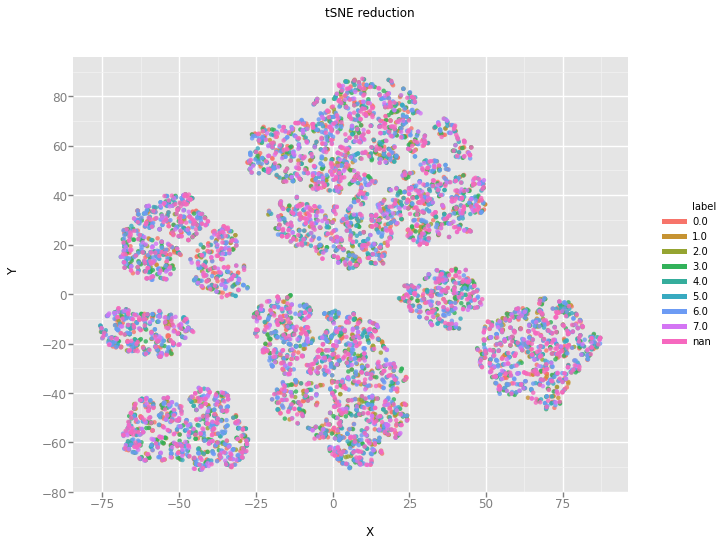

In [20]:
SHOW_GRAPH = True

if SHOW_GRAPH:
    tsne = TSNE(n_components=2)
    transformed_tsne_data = tsne.fit_transform(df_train)

    tsne_dataframe = pd.DataFrame(transformed_tsne_data)
    pax_dataframe = pd.DataFrame(y_train)
    
    tsne_dataframe = pd.concat([tsne_dataframe, pax_dataframe], axis=1, ignore_index=True)

    tsne_dataframe.columns = ['X', 'Y', 'label']

    tsne_dataframe['label'] = tsne_dataframe['label'].astype(str)

    chart = ggplot(tsne_dataframe, aes(x='X', y='Y', color='label')) + geom_point(alpha=0.8) + ggtitle("tSNE reduction")
    chart.show()

### Correlation Diagram
---

Στο παρακάτω διάγραμμα φαίνεται η συσχέτιση μεταξύ των features που χρησιμοποιούμε στο μοντέλο μας. Μεγάλη συσχέτιση μεταξύ δύο features θα έδινε και μη ακριβή αποτελέσματα. Αντιθέτως παρατηρούμε ότι κανένα από τα features δεν έχει μεγάλη συσχέτιση με κάποιο άλλο.

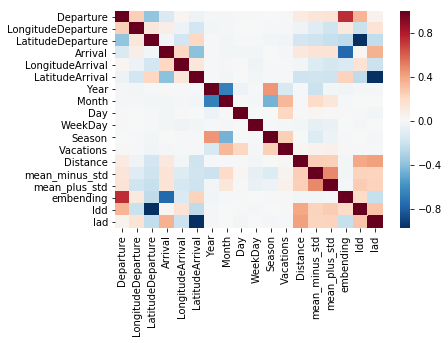

In [21]:
sns.heatmap(corr, 
            cmap="RdBu_r",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### Histograms

---

Με αυτό το τρόπο παρατηρούμε ποιες κατηγορίες 'κυριαρχούν' στο dataset και κατά συνέπεια ποιες κατηγορίες έχουν περισσότερα παραδείγματα εκπαίδευσης, όπου θα μας βοηθήσουν να προβλέψουμε σωστά και με μεγαλύτερη πιθανότητα, τη συγκεκριμένη κατηγορία. 
Αντίθετα βλέπουμε ότι η κατηγορία PAX=4 έχει πολύ λιγότερα παραδείγματα εκπαίδευσης σε σχέση με τις υπόλοιπες πράγμα το οποίο σημαίνει ότι θα είναι δύσκολο για τον ταξινομητή μας να τη προβλέψει σωστά. Για αυτό το λόγω πριν δώσουμε τα δεδομένα εκπαίδευσης στους ταξινομητές μας, ενισχύουμε τα παραδείγματα στις κατηγορίες αυτές με τη μέθοδο του OverSampling.

AxesSubplot(0.125,0.125;0.775x0.755)


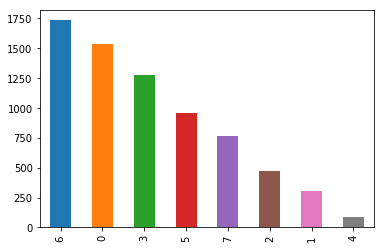

In [22]:
print(pd.value_counts(y_train.values.flatten()).plot(kind='bar'))

### Scikit learn classifiers
---

Παρακάτω ξεκινήσαμε να εκπαιδεύουμε το μοντέλο μας με απλούς classifiers από το scickit learn. Πιο συγκεκριμένα ξεκινήσαμε εφαρμόζοντας Linear Regression, Logistic Regression, DecisionTreeClassifier, KNeighborsClassifier και GradientBoostingClassifier, όπου και μας έδινε την μεγαλύτερη ακρίβεια (περίπου 43%). Στη συνέχεια χρησιμοποιήσαμε ένα συνδυασμό των παραπάνω classifiers προκειμένου οι προβλέψεις μας να είναι πιο γενικές. Χρησιμοποιώντας, λοιπόν, ensembling και κάνοντας όλους τους δυνατούς συνδυασμούς καταφέραμε να αυξήσουμε την ακρίβεια του μοντέλου μας στο 46%. Μερικά από τα αποτελέσματα φαίνονται παρακάτω.

### Ensemble Method (Logistic Regression - Linear Regression - Decision Tree - KNeighbors) Results

---


Συνδυάσαμε τους εν λόγω ταξινομητές δίνοντάς τους κάποιο βάρος, προκειμένου να δημιουργήσουμε ένα γενικευμένο μοντέλο.

Αρχικά πριν τον συνδυασμό τους, δοκιμάσαμε τον κάθε ένα ξεχωριστά και πήραμε τα εξής αποτελέσματα:


   

|<center>Classifier   </center>                                        | Time      |    Score          
|----------------------------------------------------------------------|:--------------:|---------------------:|
      | <p align="left"><b>LogisticRegression </b> (no PCA)                                          |    0.530132    | 0.4353932584269663   |
  |<p align="left"> <b>LogisticRegression </b> (PCA 0.95%) |    1.249181    | 0.3634831460674157    |   
      | <p align="left"><b> LogisticRegression</b> (X_train + PCA (mean_minus_std, mean_plus_std )    |    0.474485    | 0.4365168539325842   |       
      |<p align="left"> <b> LogisticRegression</b> (X_train + PCA (mean_minus_std mean_plus_std)                  + PCA (LongitudeDeparture LatitudeDeparture Distance)                                      
|&emsp;&emsp;&emsp; &emsp; &emsp;&emsp;&emsp;  &emsp; &emsp; &emsp; &emsp; &emsp;&emsp;&emsp;+ PCA (LongitudeArrival LatitudeArrival Distance) )     |    0.585910    |  0.4370786516853933 |  
      |<p align="left"><b> GradientBoostingClassifier</b> (X_train + PCA (mean_minus_std  mean_plus_std                                      + PCA (LongitudeDeparture  LatitudeDeparture  Distance)                                   
|&emsp;&emsp;&emsp; &emsp; &emsp;&emsp;&emsp;  &emsp; &emsp; &emsp; &emsp; &emsp;&emsp;&emsp; + PCA (LongitudeArrival LatitudeArrival   Distance)        )   |    230.314923  | 0.4505617977528089   |                                             
      |<p align="left"><b> DecisionTreeClassifier</b> (X_train + PCA (mean_minus_std   mean_plus_std)            + PCA (LongitudeDeparture  LatitudeDeparture Distance)                                          
| &emsp; &emsp; &emsp; &emsp;&emsp;  &emsp; &emsp; &emsp; &emsp; &emsp;&emsp;&emsp; + PCA (LongitudeArrival   LatitudeArrival  Distance)        )             |    0.249568    | 0.4533707865168539   |                           
      |<p align="left"> <b>KNeighborsClassifier</b> (X_train + PCA (mean_minus_std  mean_plus_std)                                 + PCA (LongitudeDeparture  LatitudeDeparture  Distance)                                       
| &emsp; &emsp;&emsp;&emsp; &emsp; &emsp; &emsp; &emsp; &emsp;&emsp;&emsp;&emsp;+ PCA (LongitudeArrival LatitudeArrival        Distance)        )               |    3.224896    | 0.4157303370786517   |     
      |<p align="left"><b>LogisticRegression     + (x1) DecisionTreeClassifier + (x2)</b> (X_train + PCA (mean_minus_std mean_plus_std)
|  &emsp; &emsp;&emsp;&emsp; &emsp; &emsp; &emsp;&emsp; &emsp; &emsp; &emsp;&emsp;+ PCA (LongitudeDeparture  LatitudeDeparture Distance)                           +  PCA (LongitudeArrival LatitudeArrival   Distance)        )      |    0.708108    | 0.4606741573033708  |




In [23]:
EXEC = False

X_train = df_train
X_test = df_test
y_train = np.ravel(y_train)

if EXEC:   
    start = time.time()
    
    # -- Logistic Regression -- #
    clf = LogisticRegression()    
    # clf.fit(X_train_2_fit, y_train)

    # -- Linear Regression -- #
    clf1 = LinearRegression()
    # clf1.fit(X_train_2_fit, y_train)

    clf2 = GradientBoostingClassifier(n_estimators=600, max_depth=None, learning_rate = 0.1)
    # clf2.fit(X_train_2_fit, y_train)

    # -- Desicion Tree --#
    clf3 = DecisionTreeClassifier()
    # clf3.fit(X_train_2_fit, y_train)

    # -- Knn Classifier --#
    clf4 = KNeighborsClassifier(n_neighbors=15, algorithm='ball_tree')
    clf4.fit(X_train_2_fit, y_train)

    estimators = []
    estimators.append(('logistic', clf))
    # estimators.append(('linear', clf1))
    estimators.append(('DSC', clf3))
    # estimators.append(('KNN', clf4))

    # ensemble = VotingClassifier(estimators, weights=[1,2])
    # ensemble.fit(X_train_2_fit, y_train)

    # y_pred = ensemble.predict(X_test_2_fit)

    y_pred = clf4.predict(X_test_2_fit)

    if DEVELOP:
        print(f1_score(y_test, y_pred, average='micro'))
    elif TEST:
        write_csv(y_pred=y_pred)
    
    end = time.time()
    print('time: {0:f}'.format(end - start))

## Calculate F1
---
Η παρακάτω συνάρτηση χρησιμοποιείται στο νευρωνικό μας μοντέλο το οποίο περιγράφεται παρακάτω, σαν μετρική για να μας δείχνει σε κάθε εποχή το f1_score που πετυχαίνει στα δεδομένα εκπαίδευσης.


In [24]:
def f1_score_metric(y_true, y_pred):

    # Count positive samples.
    c1 = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    c2 = K.sum(K.round(K.clip(y_pred, 0, 1)))
    c3 = K.sum(K.round(K.clip(y_true, 0, 1)))

    # If there are no true samples, fix the F1 score at 0.
    if c3 == 0:
        return 0

    # How many selected items are relevant?
    precision = c1 / c2

    # How many relevant items are selected?features_to_use = ['Distance', 'LongitudeDeparture', 'LatitudeDeparture', 'LongitudeArrival', 'LatitudeArrival', 'mean_minus_std', 'mean_plus_std', 'ticket']

    recall = c1 / c3

    # Calculate f1_score
    f1_score = 2 * (precision * recall) / (precision + recall)
    return f1_score

### Voting method
---
Η παρακάτω μέθοδος λαμβάνει ως ορίσματα τρεις πίνακες οι οποίοι έχουν δημιουργηθεί μετά την εκπαίδευση του Νευρωνικού μας δικτύου και περιέχουν τις προβλέψεις του μοντέλου μας για την ζητούμενη τιμή της μεταβλητής "PAX". Πιο συγκεκριμένα γίνεται ένας συμψηφισμός των αποτελεσμάτων με στόχο να δημιουργηθεί ένας νέος πίνακας που προβλέπει καλύτερα το "PAX". Έχουμε εκτιμήσει ότι η βελτίωση είναι της τάξεως του 0.5%.

In [25]:
def voting(y1, y2, y3):
    y_best = y1.copy()
    
    for i in range(len(y1)):
        if y2[i] == y3[i]:
            y_best[i] = y2[i]
        
    return y_best

### Neural Network
---
Αφού μελετήσαμε τους απλούς classifiers αποφασίσαμε να ασχοληθούμε με τα νευρωνικά δίκτυα. Παρακάτω έχουμε υλοποιήσει κάποια sequential models. Επιλέξαμε να χρησιμοποιήσουμε αρκετά μεγάλο Dropout, καθώς τα δεδομένα εκπαίδευσης κρίνονται σχετικά λίγα. Σε συνδυασμό με την μέθοδο "__voting()__" το μοντέλο μας παρήγαγε αποτελέσματα με ακρίβεια σχεδόν 65%. Για τη βελτιστοποίηση του Νευρωνικού δικτύου πειραματιστήκαμε αρκετά με τις παραμέτρους. Χρησιμοποιήσαμε διαφορετικούς optimizers και καταλήξαμε στον Adam και τον Adadelta. Επίσης, χρησιμοποιήσαμε τους "zeros" και "Ones" initializers οι οποίοι αρχικοποιούν με συγκεκριμένο τρόπο τα βάρη του νευρωνικού σε κάθε επίπεδο. Στον παρακάτω πίνακα φαίνονται μερικά από τα αποτελέσματα που παρήγαμε τοπικά, αλλά και στην ιστοσελίδα του διαγωνισμού.

| DEVELOPMENT |        |                                   |                             |          |           |              |
|-------------|--------|-----------------------------------|-----------------------------|----------|-----------|--------------|
| Optimizer   | Epochs | Dropout                           | Layers                      | f1 train | Acc train | f1 predict   |
| Adam        | 30     | 0.3 – 0.3                         |(128,64)-(128,32)            | 0.7455   | 0.7525    | 0.5278       |
| Adam        | 15     | 0.3 – 0.3                         |(128,64,32)-(64,16)          | 0.6357   | 0.6581    | 0.5359619506 |
| Adam        | 15     | (0.3, 0.2) – (0.3, 0.2)           |(256,128,64,16) -(256,128,64,32) | 0.6145   | 0.6431 | 0.5243       |
| sgd         | 30     | (0.3, 0.2) – (0.3, 0.2)           |(256,128,64)- (256,64,32,16)     | 0.6092   | 0.6331 | 0.5225       |
| rm          | 30     | (0.3, 0.2) – (0.3, 0.2)           |(256,128,64,32,16)-(128,32,16)   | 0.668    | 0.686  | 0.5349       |
| rm          | 30     | (0.3, 0.1) – (0.3, 0.1)           |(128,64,16)-(64,16)              | 0.68     | 0.7    | 0.5428       |
| rm          | 25     | (0.3, 0.1) – (0.3, 0.1)           |(128,32,16)-(128,64,32)   | 0.66     | 0.68      | 0.5314       |
| rm          | 35     | (0.3, 0.2, 0.1) – (0.3, 0.2 0.1)   |(256,64,32)-(128,64,16)    | 0.65     | 0.67      | 0.5452       |
| rm          | 30     | (0.3, 0.2 0.1) – (0.3, 0.2 0.1)   | (256,64,32)-(128,64,16)    | 0.6546   | 0.6731    | 0.534        |
| sgd         | 30     | (0.3, 0.2 0.1) – (0.3, 0.2 0.1)   |  (128,64,32,16)-(128,64,32,16) | 0.6      | 0.56  | 0.5222       |
| adam        | 30     | (0.3, 0.2 0.1) – (0.3, 0.2 0.1)   |(128,64,32,16)-(128,64,32)    |0.6899   | 0.707     | 0.537        |
| adam        | 40     | (0.3, 0.2 0.1) – (0.3, 0.2 0.1)   |(256,128,64,32)-(128,64,32,16) | 0.7373   | 0.7446  | 0.5443       |
| adam        | 40     | (0.3, 0.2, 0,1) - (0.3, 0.2, 0,1) | (128,64,32) - (128,64,16)   | 0.6808   | 0.6986    | 0.5467       |
| adam        | 50     |       (0.2, - , 0,1)             | (64,32,16)                  | 0.706    | 0.7179    | 0.57         |
| adam        | 40     | (0.2, 0.2, 0.2, 0.2, 0.2)         | (512, 256, 128, 64, 32, 16) | 0.77     | 0.7837    | 0.5366       
| adam        | 50     | (0.3, 0.2, 0,1) - (0.3, 0.2, 0,1) | (128,64,32) - (128,64,16)   | 0.7087   | 0.7172    | 0.555        |
| adam        | 40     | (0.2, 0.2, 0.1, 0.2, 0.2)         | (256, 128, 64, 32, 16)      | 0.70     | 0.69      | 0.529        |
| adam        | 40     | (0.2, 0.2, 0.2, 0.2)              | (512, 256, 128, 32, 16)     | 0.78     | 0.79      | 0.5328       |
| adam        | 40     | (0.2, 0.2, 0.2)                   | (128, 64, 32, 16)           |0.795     |0.82       | 0.518        |
| adam        | 40     | (0.4, 0.2, 0.2)                   | (128, 64, 32, 16)           |0.72    |  0.73       | 0.48         |
| adam        | 40     | (0.2, 0.2, 0.2, 0.2 0.2)          | (512, 64, 128, 32, 16)      |0.69   |    0.71      | 0.552        |
| adam        | 40     | (0.35, 0.25)                      | (256, 128, 32)              |  0.746 |   0.762     | 0.513        |
|             |        |                               TEST|                              |          |           |              |
| adam        | 35     | (0.3, 0.2 0.1) – (0.3, 0.2 0.1)   |  (256,128,32,16)-(128,64,16)| 0.6237   | 0.6537   | 0.57             |
| rm          | 35     | (0.3, 0.2 0.1) – (0.3, 0.2 0.1)   |(128,64,32,16)-(256,128,64,32)| 0.6545   | 0.6363  | 0.5889           |
| adam        | 50     | (0.3,0.2,0.1)                     | (256,128,64,32) | 0.6566   | 0.6751    | 0.5988    |
| adam        | 50     | (0.3,0.2,.0,1)                    | (128,64,32,16)  | 0.7409   | 0.7446    | 0.58083   |
| adam        | 40     | (0.35, 0.25)                      | (256, 128, 32)              | 0.68     | 0.6912    | 0.6          |
| adam        | 40     | (0.2, 0.2, 0.2, 0.2, 0.2)         | (512, 256, 128, 64, 32, 16) | 0.7305   | 0.7515    | 0.5          |
| adam        | 150    | (0.2, 0.2, 0.2, 0.2, 0.2)         | (512, 256, 128, 64, 32, 16) | 0.6873  | 0.6965| 0.52         

### Τέλος μετά από πολλούς πειραματισμούς καταλήξαμε στη παρακάτω αρχιτεκτονική η οποία έδωσε και τα παρακάτω αποτελέσματα
---
Με το υπάρχων μοντέλο και με αρκετές δοκιμές στον αριθμό των layers κάθε νευρωνικού καθώς και σε optimizers, kernel initializers καταλήξαμε να πετυχαίνουμε αποτελέσματα μεγαλύτερα του 60%

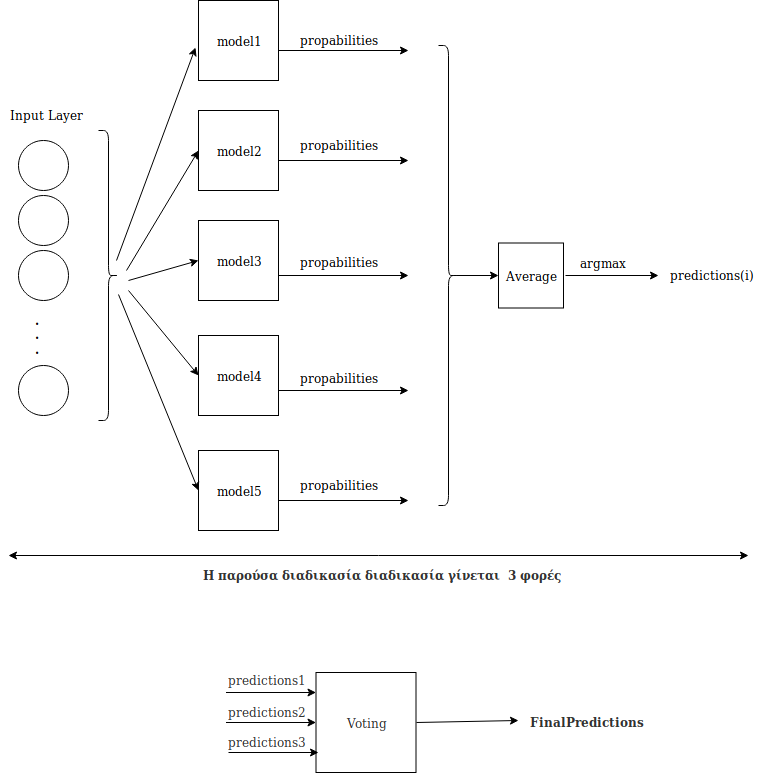

In [26]:
from IPython.display import Image
Image(filename='mlp.png')

In [27]:
EXEC = True

if EXEC:
    start = time.time()
    
    X_train = df_train
    X_test = df_test
    y_train = np.ravel(y_train)
    new_y_pred = [] # The list of the predictions from each iteration
    
    sampler = RandomOverSampler('minority')
    X_train, y_train = sampler.fit_resample(X_train, y_train)
        
    INPUT_LEN = X_train.shape[1]
    one_hot_labels_train = pd.get_dummies(y_train)
                
    for i in [1, 2, 3]:
        
        model1 = Sequential([
                Dense(128, input_shape=(INPUT_LEN,), kernel_initializer='he_uniform', bias_initializer='zeros'),
                Activation('relu'),
                Dropout(0.3),
                Dense(64, kernel_initializer='he_uniform', bias_initializer='zeros'),
                Activation('relu'),
                Dropout(0,2),
                Dense(16, kernel_initializer='he_uniform', bias_initializer='zeros'),
                Activation('relu'),
                Dense(8, kernel_initializer='he_uniform', bias_initializer='zeros'),
                Activation('softmax')
            ])

        model2 = Sequential([
                Dense(512, input_shape=(INPUT_LEN,), kernel_initializer='he_uniform', bias_initializer='Ones'),
                Activation('relu'),
                Dropout(0.3),
                Dense(256, kernel_initializer='he_uniform', bias_initializer='Ones'),
                Activation('relu'),
                Dropout(0,2),
                Dense(128, kernel_initializer='he_uniform', bias_initializer='Ones'),
                Activation('relu'),
                Dropout(0,2),
                Dense(32, kernel_initializer='he_uniform', bias_initializer='Ones'),
                Activation('relu'),
                Dense(8),
                Activation('softmax')
            ])

        model3 = Sequential([
                Dense(256, input_shape=(INPUT_LEN,), kernel_initializer='he_uniform', bias_initializer='zeros'),
                Activation('relu'),
                Dropout(0.2),
                Dense(128, kernel_initializer='he_uniform', bias_initializer='zeros'),
                Activation('relu'),
                Dropout(0,2),
                Dense(64, kernel_initializer='he_uniform', bias_initializer='zeros'),
                Activation('relu'),
                Dropout(0,2),
                Dense(16, kernel_initializer='he_uniform', bias_initializer='zeros'),
                Activation('relu'),
                Dense(8),
                Activation('softmax')
            ])

        model4 = Sequential([
                Dense(128, input_shape=(INPUT_LEN,), bias_initializer='Ones'),
                Activation('relu'),
                Dropout(0.2),
                Dense(64, bias_initializer='Ones'),
                Activation('relu'),
                Dropout(0,2),
                Dense(32, bias_initializer='Ones'),
                Activation('relu'),
                Dropout(0,1),
                Dense(16, bias_initializer='Ones'),
                Activation('relu'),
                Dense(8),
                Activation('softmax')
            ])

        model5 = Sequential([
                Dense(256, input_shape=(INPUT_LEN,), bias_initializer='Ones'),
                Activation('relu'),
                Dropout(0.2),
                Dense(128, bias_initializer='Ones'),
                Activation('relu'),
                Dropout(0,2),
                Dense(64, bias_initializer='Ones'),
                Activation('relu'),
                Dropout(0,2),
                Dense(32, bias_initializer='Ones'),
                Activation('relu'),
                Dropout(0,1),
                Dense(16, bias_initializer='Ones'),
                Activation('relu'),
                Dense(8),
                Activation('softmax')
            ])

        adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
        addelta = Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
        
        model1.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy', f1_score_metric])
        model1.fit(X_train, one_hot_labels_train, shuffle=True, epochs=(75))
        y_pred1 = model1.predict(X_test)
        
        model2.compile(optimizer=addelta, loss='categorical_crossentropy', metrics=['accuracy', f1_score_metric])
        model2.fit(X_train, one_hot_labels_train, epochs=(28))
        y_pred2 = model2.predict(X_test)

        model3.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy', f1_score_metric])
        model3.fit(X_train, one_hot_labels_train, shuffle=True, epochs=(20))
        y_pred3 = model3.predict(X_test)
     
        model4.compile(optimizer=addelta, loss='categorical_crossentropy', metrics=['accuracy', f1_score_metric])
        model4.fit(X_train, one_hot_labels_train, shuffle=True, epochs=(80))
        y_pred4 = model4.predict(X_test)

        model5.compile(optimizer=addelta, loss='categorical_crossentropy', metrics=['accuracy', f1_score_metric])
        model5.fit(X_train, one_hot_labels_train, epochs=(38))
        y_pred5 = model5.predict(X_test)

        y_pred = (y_pred1 + y_pred2 + y_pred3 + y_pred4 + y_pred5) / 5  # Compute the average of each model probalities
        y_pred = y_pred.argmax(axis=1) # Translate the results into categories
        new_y_pred.append(y_pred)

    y_pred = voting(new_y_pred[0], new_y_pred[1], new_y_pred[2]) 
               
    if TEST:
        write_csv(y_pred, 'y_pred_best.csv')
    elif DEVELOP:
        print(f1_score(y_pred, y_test, average='micro'))

    end = time.time()
    print('time: {0:f}'.format(end - start))

Epoch 1/75
8763/8763 [==============================] - 1s 74us/step - loss: 1.7417 - acc: 0.3235 - f1_score_metric: nan
Epoch 2/75
8763/8763 [==============================] - 0s 38us/step - loss: 1.3765 - acc: 0.4404 - f1_score_metric: nan
Epoch 3/75
8763/8763 [==============================] - 0s 35us/step - loss: 1.2012 - acc: 0.4966 - f1_score_metric: 0.3550
Epoch 4/75
8763/8763 [==============================] - 0s 38us/step - loss: 1.1100 - acc: 0.5381 - f1_score_metric: 0.4067
Epoch 5/75
8763/8763 [==============================] - 0s 36us/step - loss: 1.0460 - acc: 0.5556 - f1_score_metric: 0.4449
Epoch 6/75
8763/8763 [==============================] - 0s 35us/step - loss: 1.0035 - acc: 0.5790 - f1_score_metric: 0.4813
Epoch 7/75
8763/8763 [==============================] - 0s 40us/step - loss: 0.9611 - acc: 0.5918 - f1_score_metric: 0.4965
Epoch 8/75
8763/8763 [==============================] - 0s 38us/step - loss: 0.9274 - acc: 0.6007 - f1_score_metric: 0.5290
Epoch 9/75
876

8763/8763 [==============================] - 0s 35us/step - loss: 0.5377 - acc: 0.7744 - f1_score_metric: 0.7676
Epoch 67/75
8763/8763 [==============================] - 0s 43us/step - loss: 0.5296 - acc: 0.7794 - f1_score_metric: 0.7744
Epoch 68/75
8763/8763 [==============================] - 0s 39us/step - loss: 0.5341 - acc: 0.7778 - f1_score_metric: 0.7749
Epoch 69/75
8763/8763 [==============================] - 0s 40us/step - loss: 0.5355 - acc: 0.7748 - f1_score_metric: 0.7705
Epoch 70/75
8763/8763 [==============================] - 0s 40us/step - loss: 0.5291 - acc: 0.7799 - f1_score_metric: 0.7779
Epoch 71/75
8763/8763 [==============================] - 0s 40us/step - loss: 0.5194 - acc: 0.7827 - f1_score_metric: 0.7770
Epoch 72/75
8763/8763 [==============================] - 0s 38us/step - loss: 0.5242 - acc: 0.7808 - f1_score_metric: 0.7757
Epoch 73/75
8763/8763 [==============================] - 0s 40us/step - loss: 0.5262 - acc: 0.7881 - f1_score_metric: 0.7839
Epoch 74/75


8763/8763 [==============================] - 1s 67us/step - loss: 1.1244 - acc: 0.5255 - f1_score_metric: 0.4022
Epoch 9/80
8763/8763 [==============================] - 1s 65us/step - loss: 1.0855 - acc: 0.5370 - f1_score_metric: 0.4297
Epoch 10/80
8763/8763 [==============================] - 1s 72us/step - loss: 1.0535 - acc: 0.5563 - f1_score_metric: 0.4564
Epoch 11/80
8763/8763 [==============================] - 1s 66us/step - loss: 1.0186 - acc: 0.5670 - f1_score_metric: 0.4722
Epoch 12/80
8763/8763 [==============================] - 1s 67us/step - loss: 1.0035 - acc: 0.5743 - f1_score_metric: 0.4947
Epoch 13/80
8763/8763 [==============================] - 1s 61us/step - loss: 0.9806 - acc: 0.5819 - f1_score_metric: 0.5010
Epoch 14/80
8763/8763 [==============================] - 1s 62us/step - loss: 0.9551 - acc: 0.5908 - f1_score_metric: 0.5219
Epoch 15/80
8763/8763 [==============================] - 1s 61us/step - loss: 0.9427 - acc: 0.5976 - f1_score_metric: 0.5303
Epoch 16/80
8

8763/8763 [==============================] - 0s 45us/step - loss: 0.5645 - acc: 0.7630 - f1_score_metric: 0.7565
Epoch 74/80
8763/8763 [==============================] - 0s 41us/step - loss: 0.5702 - acc: 0.7607 - f1_score_metric: 0.7537
Epoch 75/80
8763/8763 [==============================] - 0s 37us/step - loss: 0.5626 - acc: 0.7637 - f1_score_metric: 0.7596
Epoch 76/80
8763/8763 [==============================] - 0s 42us/step - loss: 0.5579 - acc: 0.7712 - f1_score_metric: 0.7665
Epoch 77/80
8763/8763 [==============================] - 0s 38us/step - loss: 0.5459 - acc: 0.7721 - f1_score_metric: 0.7672
Epoch 78/80
8763/8763 [==============================] - 0s 39us/step - loss: 0.5535 - acc: 0.7710 - f1_score_metric: 0.7655
Epoch 79/80
8763/8763 [==============================] - 0s 37us/step - loss: 0.5477 - acc: 0.7693 - f1_score_metric: 0.7657
Epoch 80/80
8763/8763 [==============================] - 0s 37us/step - loss: 0.5351 - acc: 0.7775 - f1_score_metric: 0.7725
Epoch 1/38
8

8763/8763 [==============================] - 0s 46us/step - loss: 0.7446 - acc: 0.6766 - f1_score_metric: 0.6551
Epoch 21/75
8763/8763 [==============================] - 0s 39us/step - loss: 0.7344 - acc: 0.6899 - f1_score_metric: 0.6637
Epoch 22/75
8763/8763 [==============================] - 0s 49us/step - loss: 0.7225 - acc: 0.6888 - f1_score_metric: 0.6650
Epoch 23/75
8763/8763 [==============================] - 0s 46us/step - loss: 0.7117 - acc: 0.6984 - f1_score_metric: 0.6746
Epoch 24/75
8763/8763 [==============================] - 0s 50us/step - loss: 0.7058 - acc: 0.7059 - f1_score_metric: 0.6820
Epoch 25/75
8763/8763 [==============================] - 0s 47us/step - loss: 0.6992 - acc: 0.7022 - f1_score_metric: 0.6835
Epoch 26/75
8763/8763 [==============================] - 0s 44us/step - loss: 0.6845 - acc: 0.7084 - f1_score_metric: 0.6929
Epoch 27/75
8763/8763 [==============================] - 0s 43us/step - loss: 0.6822 - acc: 0.7139 - f1_score_metric: 0.6928
Epoch 28/75


8763/8763 [==============================] - 2s 223us/step - loss: 0.9233 - acc: 0.5993 - f1_score_metric: 0.5320
Epoch 11/28
8763/8763 [==============================] - 2s 178us/step - loss: 0.8828 - acc: 0.6151 - f1_score_metric: 0.5567
Epoch 12/28
8763/8763 [==============================] - 2s 242us/step - loss: 0.8638 - acc: 0.6257 - f1_score_metric: 0.5773
Epoch 13/28
8763/8763 [==============================] - 2s 215us/step - loss: 0.8307 - acc: 0.6416 - f1_score_metric: 0.5984
Epoch 14/28
8763/8763 [==============================] - 2s 208us/step - loss: 0.8019 - acc: 0.6590 - f1_score_metric: 0.6199
Epoch 15/28
8763/8763 [==============================] - 2s 202us/step - loss: 0.7785 - acc: 0.6648 - f1_score_metric: 0.6348
Epoch 16/28
8763/8763 [==============================] - 2s 179us/step - loss: 0.7587 - acc: 0.6752 - f1_score_metric: 0.6484
Epoch 17/28
8763/8763 [==============================] - 2s 179us/step - loss: 0.7381 - acc: 0.6808 - f1_score_metric: 0.6595
Epoc

8763/8763 [==============================] - 0s 42us/step - loss: 0.7230 - acc: 0.6885 - f1_score_metric: 0.6646
Epoch 28/80
8763/8763 [==============================] - 0s 44us/step - loss: 0.7210 - acc: 0.6906 - f1_score_metric: 0.6694
Epoch 29/80
8763/8763 [==============================] - 0s 53us/step - loss: 0.6989 - acc: 0.7047 - f1_score_metric: 0.6877
Epoch 30/80
8763/8763 [==============================] - 0s 46us/step - loss: 0.7046 - acc: 0.6985 - f1_score_metric: 0.6812
Epoch 31/80
8763/8763 [==============================] - 0s 42us/step - loss: 0.6906 - acc: 0.7057 - f1_score_metric: 0.6873
Epoch 32/80
8763/8763 [==============================] - 0s 44us/step - loss: 0.6883 - acc: 0.7042 - f1_score_metric: 0.6892
Epoch 33/80
8763/8763 [==============================] - 0s 44us/step - loss: 0.6729 - acc: 0.7169 - f1_score_metric: 0.7023
Epoch 34/80
8763/8763 [==============================] - 0s 45us/step - loss: 0.6709 - acc: 0.7106 - f1_score_metric: 0.6950
Epoch 35/80


8763/8763 [==============================] - 1s 67us/step - loss: 0.9036 - acc: 0.6109 - f1_score_metric: 0.5594
Epoch 13/38
8763/8763 [==============================] - 1s 62us/step - loss: 0.8728 - acc: 0.6231 - f1_score_metric: 0.5798
Epoch 14/38
8763/8763 [==============================] - 1s 58us/step - loss: 0.8422 - acc: 0.6409 - f1_score_metric: 0.6015
Epoch 15/38
8763/8763 [==============================] - 1s 64us/step - loss: 0.8220 - acc: 0.6452 - f1_score_metric: 0.6125
Epoch 16/38
8763/8763 [==============================] - 1s 66us/step - loss: 0.8078 - acc: 0.6597 - f1_score_metric: 0.6286
Epoch 17/38
8763/8763 [==============================] - 1s 63us/step - loss: 0.7761 - acc: 0.6693 - f1_score_metric: 0.6394
Epoch 18/38
8763/8763 [==============================] - 1s 66us/step - loss: 0.7557 - acc: 0.6775 - f1_score_metric: 0.6507
Epoch 19/38
8763/8763 [==============================] - 1s 69us/step - loss: 0.7468 - acc: 0.6829 - f1_score_metric: 0.6612
Epoch 20/38


8763/8763 [==============================] - 1s 80us/step - loss: 0.6277 - acc: 0.7339 - f1_score_metric: 0.7209
Epoch 40/75
8763/8763 [==============================] - 1s 79us/step - loss: 0.6364 - acc: 0.7295 - f1_score_metric: 0.7165
Epoch 41/75
8763/8763 [==============================] - 1s 87us/step - loss: 0.6217 - acc: 0.7349 - f1_score_metric: 0.7238
Epoch 42/75
8763/8763 [==============================] - 1s 96us/step - loss: 0.6238 - acc: 0.7382 - f1_score_metric: 0.7255
Epoch 43/75
8763/8763 [==============================] - 1s 85us/step - loss: 0.6201 - acc: 0.7380 - f1_score_metric: 0.7254
Epoch 44/75
8763/8763 [==============================] - 1s 96us/step - loss: 0.6035 - acc: 0.7440 - f1_score_metric: 0.7328
Epoch 45/75
8763/8763 [==============================] - 1s 91us/step - loss: 0.5960 - acc: 0.7520 - f1_score_metric: 0.7431
Epoch 46/75
8763/8763 [==============================] - 1s 83us/step - loss: 0.6095 - acc: 0.7448 - f1_score_metric: 0.7376
Epoch 47/75


8763/8763 [==============================] - 2s 184us/step - loss: 1.4051 - acc: 0.4322 - f1_score_metric: nan
Epoch 2/20
8763/8763 [==============================] - 1s 64us/step - loss: 1.0560 - acc: 0.5460 - f1_score_metric: 0.4110
Epoch 3/20
8763/8763 [==============================] - 1s 63us/step - loss: 0.9439 - acc: 0.5911 - f1_score_metric: 0.5086
Epoch 4/20
8763/8763 [==============================] - 1s 63us/step - loss: 0.8745 - acc: 0.6153 - f1_score_metric: 0.5530
Epoch 5/20
8763/8763 [==============================] - 1s 62us/step - loss: 0.8199 - acc: 0.6449 - f1_score_metric: 0.6016
Epoch 6/20
8763/8763 [==============================] - 1s 63us/step - loss: 0.7732 - acc: 0.6631 - f1_score_metric: 0.6307
Epoch 7/20
8763/8763 [==============================] - 1s 64us/step - loss: 0.7452 - acc: 0.6790 - f1_score_metric: 0.6491
Epoch 8/20
8763/8763 [==============================] - 1s 70us/step - loss: 0.7184 - acc: 0.6873 - f1_score_metric: 0.6633
Epoch 9/20
8763/8763 

8763/8763 [==============================] - 0s 44us/step - loss: 0.6046 - acc: 0.7396 - f1_score_metric: 0.7319
Epoch 47/80
8763/8763 [==============================] - 0s 46us/step - loss: 0.5989 - acc: 0.7518 - f1_score_metric: 0.7406
Epoch 48/80
8763/8763 [==============================] - 0s 46us/step - loss: 0.6001 - acc: 0.7484 - f1_score_metric: 0.7430
Epoch 49/80
8763/8763 [==============================] - 0s 48us/step - loss: 0.5955 - acc: 0.7507 - f1_score_metric: 0.7448
Epoch 50/80
8763/8763 [==============================] - 0s 45us/step - loss: 0.5924 - acc: 0.7518 - f1_score_metric: 0.7444
Epoch 51/80
8763/8763 [==============================] - 0s 49us/step - loss: 0.5863 - acc: 0.7535 - f1_score_metric: 0.7471
Epoch 52/80
8763/8763 [==============================] - 0s 48us/step - loss: 0.5840 - acc: 0.7582 - f1_score_metric: 0.7500
Epoch 53/80
8763/8763 [==============================] - 0s 50us/step - loss: 0.5834 - acc: 0.7561 - f1_score_metric: 0.7522
Epoch 54/80


8763/8763 [==============================] - 1s 81us/step - loss: 0.5987 - acc: 0.7445 - f1_score_metric: 0.7389
Epoch 32/38
8763/8763 [==============================] - 1s 71us/step - loss: 0.5756 - acc: 0.7606 - f1_score_metric: 0.7566
Epoch 33/38
8763/8763 [==============================] - 1s 68us/step - loss: 0.5790 - acc: 0.7532 - f1_score_metric: 0.7474
Epoch 34/38
8763/8763 [==============================] - 1s 76us/step - loss: 0.5617 - acc: 0.7649 - f1_score_metric: 0.7612
Epoch 35/38
8763/8763 [==============================] - 1s 84us/step - loss: 0.5497 - acc: 0.7691 - f1_score_metric: 0.7636
Epoch 36/38
8763/8763 [==============================] - 1s 73us/step - loss: 0.5402 - acc: 0.7728 - f1_score_metric: 0.7701
Epoch 37/38
8763/8763 [==============================] - 1s 73us/step - loss: 0.5420 - acc: 0.7704 - f1_score_metric: 0.7677
Epoch 38/38
8763/8763 [==============================] - 1s 76us/step - loss: 0.5296 - acc: 0.7780 - f1_score_metric: 0.7749
0.6196629213